In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\new1.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
2,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
3,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,N
4,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df['Loan_Status'].value_counts()

Loan_Status
Y    391
N    223
Name: count, dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,593.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.559865,342.00000,0.842199
std,6109.041673,2926.248369,85.590616,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])

In [9]:
df['Married']=df['Married'].fillna(df['Married'].mode().iloc[0])


In [10]:

df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode().iloc[0])


In [11]:

df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])


In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean()).astype(int)

In [13]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()).astype(int)

In [14]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean()).astype(int)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,0,Semiurban,N
2,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360,1,Semiurban,N
3,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109,360,1,Urban,N
4,LP001029,Male,No,0,Graduate,No,1853,2840.0,114,360,1,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173,360,1,Semiurban,Y
610,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157,360,1,Rural,Y
611,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360,1,Rural,Y
612,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,1,Rural,Y


In [18]:
def detect_and_remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
numerical_df = df.select_dtypes(include=['number'])

for column in numerical_df.columns:
    df = detect_and_remove_outliers(df, column)

In [20]:
from sklearn.preprocessing import LabelEncoder
headers = df.select_dtypes(exclude=['number'])

label_encoder = LabelEncoder()
for column in headers:
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,0,4583,1508.0,128,360,1,0,0
3,8,1,1,2,0,0,2500,1840.0,109,360,1,2,0
4,9,1,0,0,0,0,1853,2840.0,114,360,1,0,0
6,11,1,1,0,1,0,4887,0.0,133,360,1,0,0
11,15,1,0,0,1,0,1442,0.0,35,360,1,2,0


In [22]:
df.dtypes


Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int32
Loan_Amount_Term       int32
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

Evaluating LR...
LR: 0.744974 (0.090530)
Evaluating LDA...
LDA: 0.741402 (0.086656)
Evaluating KNN...
KNN: 0.741138 (0.111645)
Evaluating CART...
CART: 0.716138 (0.078193)
Evaluating NB...
NB: 0.686508 (0.079040)
Evaluating RF...
RF: 0.759656 (0.094615)


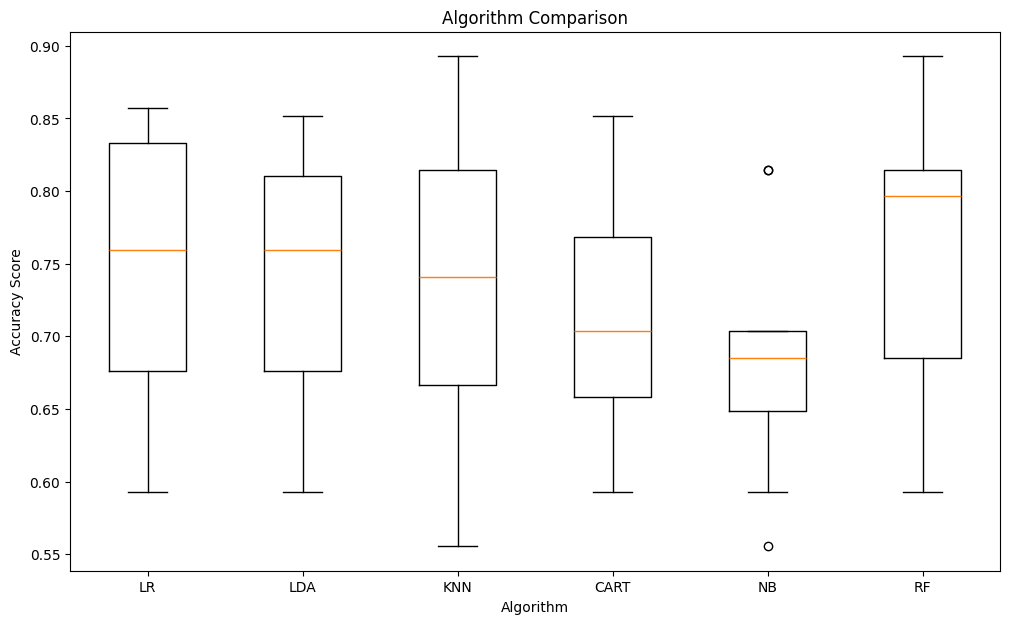

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning
import warnings





X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']


y = y.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

validation_size = 0.20
seed = 6
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=validation_size, random_state=seed)

models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=seed)))

results = []
names = []

for name, model in models:
    print(f"Evaluating {name}...")
    try:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

plt.figure(figsize=(12, 7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.show()

In [24]:

rf_model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 4}, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = rf_model.predict(X_test)

print("accuracy",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy 0.7941176470588235
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.80      0.98      0.88        52

    accuracy                           0.79        68
   macro avg       0.77      0.58      0.59        68
weighted avg       0.79      0.79      0.74        68

Confusion Matrix:
[[ 3 13]
 [ 1 51]]


In [26]:
def detect_and_remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for i in df.columns:
  detect_and_remove_outliers(df,i)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: >

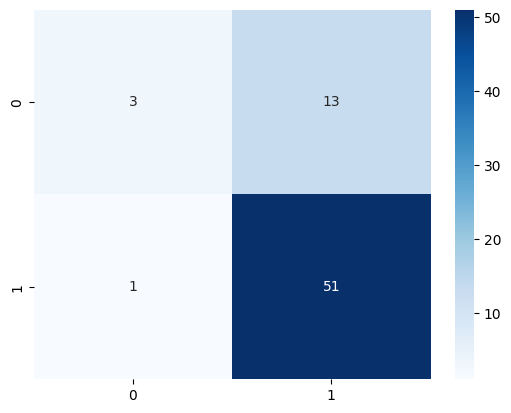

In [27]:
!pip install seaborn
import seaborn as sns
conf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [28]:
import pickle
pickle_out=open("rf_model.pkl","wb")
pickle.dump(rf_model,pickle_out)
pickle_out.close()

In [29]:
pickle_out = open("rf_model.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [30]:
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)
